In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

The goal of this HandsOn meetup is to get you started using the TensorFlow framework and provide knowledge needed to understand and write simple TensorFlow code in Python. This notebook does NOT cover deep learning. The techniques chosen for this notebook do not necessarily, and most likely, will NOT transer well to other problems. There are many different methods and approaches that could have been used to solve the simple problem of this notebook and the methods chosen for this notebook are not necessarily the best either; they were chosen to simplify the content. Therefore, try not to become too engulfed in all the details of this notebook and instead just try to get the overall picture of what's going on.

Content:

1. Computational Graphs
2. Tensors
    - variables
    - constants
    - placeholders
    - performing operations
    
3. Initialize variables + run session
4. Cost function, optimizer, and forward and backward propagation
5. Excercise: Solving a Linear Regression Model


Bonus: TensorBoard

# Computational Graphs

![title](images/simple-cg2.png)

TensorFlow computations are organized in a computational graph and data flows through this built graph. The computation graph will be referred to as CG from now on. The CG helps organize the build from mapping input to output. The main reason that CGs are important for us is because the TensorFlow framework requires that we first define a CG before we are allowed to let data flow through the graph.

Time to start learning how to build a computational graph and other important components.

# 2. Tensors

A Tensor is a vector or matrix of n-dimensions that represents all types of data. All values in a tensor hold identical data type with a known or partially known shape. The framework name "TensorFlow" pretty much summarizes what it is: a flow of Tensors just like in our CG above! In TF, all the computations pass through one or more tensors. So, to make the CG above we must first make tensors for X, m, b, and Y_true. Try not to think of anything in the computational graph as a numpy variable such as x=3 because it will cause problems and headaches in the future.


### Tensors: Variables

In our CG we have a Tensor variable called b. Since it is a variable it is able to represent different values which are dictated by the calculations that will take place in the CG. To make our Tensor variable, b, we can call
    
    tf.Variable()

The tf.Variable constructor requires that you pass an initial value. It is pretty common that people just pass random initial values; however, you can of course pass whatever value you want. Because it is a variable Tensor, this initial value has the ability to keep changing in a certain direction depending on what is being calculated in the CG. So, just remember that even though we initialize a value for a tensor variable, it can and will most likely change to other values as calculations are being computed. We will see more of that later.

Alongside the intial value, you should define a data type with 'dtype='; tf.float32 is a commonly used dtype. If you are using floats, I suggest using tf.float32 because tf.float64 sometimes causes errors. It is also useful to add a 'name=' of the object which is used to visually see in something called TensorBoard. You can name all Tensors you make.

In [2]:
variable_a = tf.Variable(12, dtype=tf.float32, name='variable_a')
print(variable_a)

random_var = tf.Variable(tf.random_uniform([5], 0, 10, dtype=tf.int32, name='rand_variable'))
print(random_var)

<tf.Variable 'variable_a:0' shape=() dtype=float32_ref>
<tf.Variable 'Variable:0' shape=(5,) dtype=int32_ref>


output: 

tf.Variable 'variable_a:0' shape=() dtype=float32_ref 

tf.Variable 'Variable:0' shape=(5,) dtype=int32_ref

As you can see, we do NOT have a printout of 12 or random numbers. Instead we just have a little bit of text about the tensor. This is because our tensors must be run in something called a session in order to compute or print any type of value. We will look more into this later in the notebook.

### Tensors: Constants

Constants are values that never change no matter what computations and values are being passed through the CG. For example, if we wanted to set up an equation such as 

    2*e=f
    
we would use for the value 2

    tf.constant()

Similar to Tensor variables, we define the value. However, this command makes sure that the value that we set will not change. Additionally, it is recommended to define the dtype and name.

In [3]:
tensor_constant = tf.constant(2, dtype=tf.int32, name='constant_2')
print(tensor_constant)

Tensor("constant_2:0", shape=(), dtype=int32)


Output: Tensor("constant_2:0", shape=(), dtype=int32)

As usual, we don't have an object output of 2 but instead a Tensor with some information.

### Tensors: Placeholders

As explained, the CG is just a set up tensors. We need to be able to feed data into the CG in order to do something. In the CG above, there are two star shaped figures called X and Y_true. These star shapes are Tensors called placeholders. Placeholders are tensors that allow data to be fed into. For our CG above, placeholder X is used as an entry point for training data which will flow into the graph. So, the data is something that is real and concrete but the placeholder X itself abstract. The Y_pred placeholder is used to feed the true labels into the CG while the tensor Y_pred is as usual abstract.

Creating placeholder tensors are a little bit different especially when using them to feed data into a CG. The data that feeds into the CG could have various amounts of training examples. However, the amount of data that feeds into the CG is irrelevant. So, when creating a placeholder, if you define a shape which I highly recommended that you do, you want to place 'None' in the dimension for the training examples. This tells the Tensor placeholder than it doesn't matter what shape feeds into it at that dimension.

In [4]:
# Placeholder
# Assuming that you have a dataframe of shape (training examples, features),
# you should place 'None' in the first position of the shape argument. 
# Let's pretend that I have a data matrix of 5000 data samples and 9 features: shape(5000, 9).
# In order to make a placeholder for that data, it should look like the following
x_input = tf.placeholder(dtype=tf.float32, shape=[None, 9], name='x_input')
print(x_input)

Tensor("x_input:0", shape=(?, 9), dtype=float32)


Output: Tensor("x_input_1:0", shape=(?, 9), dtype=float32)

When you print this tensor you will see a '?'. This means that the Tensor placeholder at that dimension is flexible in the amount of data comes feeds into it.

### Tensors: Performing operations with tensors

Since our Tensor holders in a CG set up data to flow and perform calculations then we must also set up those operations. TF can perform many of the necessary mathematical operations such as add, subtract, matrix multiplaction, log, etc. The list of math operations can be found at the link below. I would suggest following the format tf.math_operation_here(tensor_here, other_tensor_here). Sometimes doing something like tensor1+tensor2, addition, works but sometimes it does not. So, to save yourself from future headaches, use the TF syntax.

https://www.tensorflow.org/api_docs/cc/group/math-ops

TF operation examples:

subtract -- tf.subtract(tensor1, tensor2)

addition -- tf.add(tensor1, tensor2)

Truth values of (x<y) element wise -- tf.less(tensor1, tensor2)

# 3. Initialize Variables and Run with Sessions

Now, that we know how to define tensors, we need to figure out how to excute them so we can return values. To do that, there are 2 very important steps.

1. Initialize variables
2. Run a session

Initializing variables will excecute the initial values for those holders in the CG. It does not matter if it is us who selected the initial variable value or if it is a random selection of values. The variables MUST be initialized first and it is usually done with the statment

    init = tf.global_variables_initializer()
    
After this init object is defined, we will run it through something called a session. Running a session is what executes our tensors so they can actually do something and give us values. There are several ways of running a session but we will only look at one; which is the most common and automatically closes the session. First we make the session with a with statement and then when we excecute a tensor we call it with .run(). So wrapping it all together, it would look something like this

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        
Thus, sess.run(init) will excecute the variables so they have initial values. Similarly, sess.run() executes whatever Tensor is passed as an argument. Furthermore, .run() is how we feed data into Tensor placeholders. To do this, pass feed_dict={} and inside the brackets we place the Tensor placeholders as a key and the data object as a value. It could look something like this.

    init = tf.global_variables_initializer()
    with tf.Session() as sess:
        sess.run(init)
        sess.run(tensor_object, feed_dict={placholder_object: data})
        
To better understand this look below.

<img src="images/placeholder-example.png" alt="Drawing" style="width: 250px;"/>

In [5]:
### Fake data example there are 10 training examples and 4 features (10,4)
# Setting the seed so you get the same output answer.
np.random.seed(23)
fake_data = np.random.randn(10, 4)

# Make a placeholder entry point to feed data into. 
# We define shape=[None, 4] because our placeholder should be able to
# accept any amount of training examples 4 is how many features each
# training example has.
placeholder_e = tf.placeholder(dtype=tf.float32, shape=[None, 4], name='input')

# Generating a random sequence of integers as a TF variable. I set seed=1 so your answer should match the output.
# The shape is (1, 4) because this will be added to every training example.
# So, it is completely irrelevant how many training examples our data has.
variable_f = tf.Variable(tf.random_uniform(shape=[1,4], minval=0, maxval=100, dtype=tf.float32, seed=1), dtype=tf.float32, name='variable_f')

# Add the values in the variable1 tensor to data that gets fed into the placeholder.
added_values = tf.add(placeholder_e, variable_f, name='g')

# Create variable initiailzation object, execute in session, and run added_values with feed_dict={} to feed actual data.
init = tf.global_variables_initializer()
with tf.Session() as sess:
    sess.run(init)
    result = sess.run(added_values, feed_dict={placeholder_e: fake_data})
    
print(result)

[[ 24.5707283   92.06576538   4.27362394  50.52308273]
 [ 24.60541153  90.98887634   4.68369532  48.43698883]
 [ 22.58159256  93.81221008   4.70378447  50.24458694]
 [ 24.22601128  92.10029602   4.00779343  48.56450653]
 [ 24.34547615  93.16883087   3.21317554  48.63567734]
 [ 23.70189857  93.08532715   5.58940506  50.38656616]
 [ 24.14484596  91.08744812   4.9149766   50.84169769]
 [ 24.0773735   90.8167038    6.46656322  50.0321579 ]
 [ 24.63261604  94.00839233   4.50345516  48.89503098]
 [ 21.39751053  92.18691254   5.65743876  49.5519104 ]]


Ouput : array([[24.570728 , 92.065765 ,  4.273624 , 50.523083 ],
       [24.605412 , 90.98888  ,  4.6836953, 48.43699  ],
       [22.581593 , 93.81221  ,  4.7037845, 50.244587 ],
       [24.226011 , 92.100296 ,  4.0077934, 48.564507 ],
       [24.345476 , 93.16883  ,  3.2131755, 48.635677 ],
       [23.701899 , 93.08533  ,  5.589405 , 50.386566 ],
       [24.144846 , 91.08745  ,  4.9149766, 50.841698 ],
       [24.077374 , 90.8167   ,  6.466563 , 50.032158 ],
       [24.632616 , 94.00839  ,  4.503455 , 48.89503  ],
       [21.39751  , 92.18691  ,  5.6574388, 49.55191  ]], dtype=float32)

### Mini-exercise

<img src="images/mini-exerc.png" alt="Drawing" style="width: 800px;"/>

In [6]:
# Set up the CG above and then execute it in a session.
# h_data and i_data each have 4 training examples and 2 features so take that into 
# consideration when assigning the shape of your placeholders.
np.random.seed(10)
h_data = np.random.randn(4,2)
i_data = np.random.randn(4,2)

# Create placeholders.
h_placeholder = tf.placeholder(dtype=tf.float32, shape=[None, 2], name='h_input')
i_placeholder = tf.placeholder(dtype=tf.float32, shape=[None, 2], name='i_input')

# Create constant with value 0.6.
constant_06 = tf.constant(0.60, dtype=tf.float32, name='constant06')

# Create tensor called rand_var with an initiatlizatin value of 0.80.
rand_var = tf.Variable(0.80, dtype=tf.float32, name='random_variable')

# Create element-wise math operations for j, k, l and m according to the flow of the CG.
j = tf.divide(h_placeholder, i_placeholder)
k = tf.subtract(j, constant_06)
l = tf.sin(k)
m = tf.add(l, rand_var)

# Create variable initiailzation object.
init = tf.global_variables_initializer()

# Execute the calculations in a session.
with tf.Session() as sess:
    # Run init object to execute. 
    sess.run(init)
    
    # Run tensor m to excecute and use feed_dict={} to feed data into placeholders.
    result = sess.run(m, feed_dict={h_placeholder:h_data, i_placeholder:i_data})
    
print(result)

[[ 1.77068567  1.79987645]
 [ 1.65587759  0.22961956]
 [-0.14702028 -0.16363454]
 [ 1.33229971  0.45133519]]


output: array([[ 1.7706857 ,  1.7998765 ],
       [ 1.6558776 ,  0.22961962],
       [-0.14702034, -0.16363466],
       [ 1.3322997 ,  0.45133522]], dtype=float32)

# 4. Cost function, optimizer, and forward and backward propagation

We now know how to define tensors, initialize variables, and execute them with data, it's time to take things further. Our computational graph is actually a linear function

    y = m*x + b
    
M and b dictate where and how a line is positioned in 2-dimensional space From here on out, I am going to refer to m as weight, w, because in the machine learning world coefficients are often called weights.

    y = w*x +b

In order to optimize w and b that best map the input to target ouput, given training example data, we need to be able to determine if we are stepping in the right direction. A cost function tells us how far off our model is from making correct predictions relative to the true targets. The values from the cost function are often called error or loss. We want the model predictions to be as close as possible to the true targets of the data; therefore, we want to MINIMIZE the loss or errors. In our linear function, the only way to minimize errors is by optimizing w and b. Changing these values will control how well our model performs. This is why there are variable Tensors because weights and biases play a central role in deep learning and our CG needs to have adjustable tensors in order to optimize the model to make better predictions.


To optimize variable tensors, the gradient descent algorithm takes the partial derivatives of the cost function with respect to its inputs using the "chain rule". The partial derivatives are the slopes and it points us in the steepest direction towards the minimum. So, since it's pointing in the right direction, we take a small step in that direction which is controlled by a parameter called the learning rate. This whole process of computing partial derivates with respect to inputs and slightly adjusting variables to minimize the cost is called backward propagation. Since backpropagation adjusts the variables only by a small margin, the process of forwarward propagation, checking error losses, and backpropgation must be perfomed many times. In the linear function example, we use gradient descent to keep nudging w and b in small steps until the predictions are as close as possible to the true targets. In TF, to minimize the cost function with the gradient descent algorithm we can use

        optimizer = tf.train.GradientDescentOptimizer(learning_rate_here)
        optimizer = optimizer.minimize(cost_tensor_here)
        
The optimize is then called with sess.run() and every time it is run, our w and b will change slightly in the direction that minimizes the cost error.

This is the "magic" of the TF framework! It automatically computes partial derivatives to optimize variables in an iterative process; the backward pass for calculating partial derivatives is called BACKWARD PROPAGATION. In order to take advantage of this powerful framework you have to understand and be able to, at the most basic level, write the forward pass of a CG which is called FORWARD PROPAGATION. 

The figure below displays how a model's weights are being optimized a little step at a time until it's losses are as small as possible. This also means that making predictions with the final weight values should give us predictions that are as close to the true targets as can be.

![](https://camo.githubusercontent.com/7491264fba17ff7eb3ec5cce2e0f8db3e58e1c7b/68747470733a2f2f6d6f7276616e7a686f752e6769746875622e696f2f7374617469632f726573756c74732f746f7263682f312d312d322e676966)




# 4. Excercise: Solving a Linear Regression Model

![title](images/backprop.png)

Let's apply our new knowledge to solving a simple linear regression model. Even though it's simple it does NOT make it unimportant by any means. The CG that we have been looking at this whole time is a linear function and your assignment is to execute the forward propagation in TF.

    y = w*x + b

Below we will generate 200 data points. Next, we will create variable Tensors and initialize values for w, or m, and b. The goal will be to use TF in order to see if it can properly calculate our coefficients. As previously explained, we must write the forward propagation of our CG and TF will take care of the backprogation calculations for us. A type of cost function will be used to determine how well the model performs by calculating the error, loss. The Gradient Descent Algorithm will calculate the partial derivatives of the cost and all other inputs. Think of it as finding the steepest slopes and we will move all our variables by a tiny step, controlled by the learning rate, towards that direction. We will feed one training example at at a time for Gradient Descent; this is called Stochastic Gradient Descent (SGD). When all training examples have been fed into the model then one epoch has been perfomed. However, this one epoch will not be enough to converge to the optimized values we are looking for. This is because we have defined a small learning rate which takes a small step in the steepest slope direction calculated during gradient descent. Therefore, we must perform many epochs until the model converges to values that are stable.

FYI: I've left many details out of this to try to make it as simple as possible. Additionaly, I have purposely implemented this model slightly incorrect for the sake of simplicity. The point of the excercise is to implement some TF coding basics; NOT to create the best model.

Shape of x data: (200, 1)
Shape of y data: (200, 1)


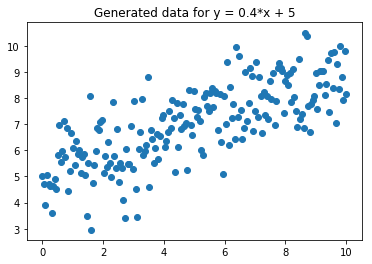

In [7]:
# Generating Data
w_model = 0.4
b_model = 5

np.random.seed(9)
x_data = np.linspace(0.0, 10.0, 200)
noise = np.random.randn(len(x_data))
y_true = (w_model * x_data) + b_model + noise

x_data = x_data.reshape(x_data.shape[0],1)
y_true = y_true.reshape(y_true.shape[0],1)

print('Shape of x data:', x_data.shape)
print('Shape of y data:', y_true.shape)

plt.title('Generated data for y = {}*x + {}'.format(w_model, b_model))
plt.scatter(x_data, y_true)
plt.show()

Value of w after training: 0.388
Value of b after training: 4.947
Model: y = 0.388*x + 4.947


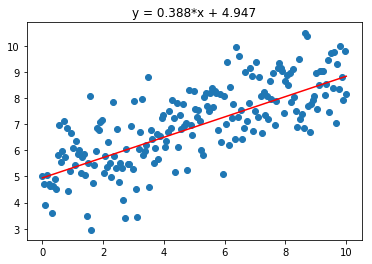

In [8]:
# Do not worry about this.
tf.reset_default_graph()

# Create placeholders.
X = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='input')
Y = tf.placeholder(dtype=tf.float32, shape=[None, 1], name='Y_true')

# Create variables. For the purposes of this excercise you 
# should start variable w with 0.33 and b with 0.05.
w = tf.Variable(0.33, tf.float32, name='w')
b = tf.Variable(0.05, tf.float32, name='b')

# Write the formula for predictions of a linear function with tensors.
y_pred = tf.add(tf.multiply(X, w), b, name='prediction')

# Cost function. This is provided for you. You don't not have to do anything here.
cost = tf.reduce_sum(tf.square(tf.subtract(Y, y_pred)), name='cost')

# Create an optimizer and minimize the cost. For this excercise you will
# use the GradientDescentOptimzer and a learning rate of 0.001.
# This can also be done in one line of code instead of two.
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.001)
optimizer = optimizer.minimize(cost)

# Create variable initiailzation object.
init = tf.global_variables_initializer()

# Start session here.
with tf.Session() as sess:
    # run init to execute the global variables.
    sess.run(init)
    
    # Ignore this.
    writer = tf.summary.FileWriter('./output', sess.graph)

    # Performs 50 epochs.
    for epoch in range(50):
        # We will loop through all training examples and pass one training example at a time.
        for x, y in zip(x_data, y_true):
            x = x.reshape(1,1)
            y = y.reshape(1,1)
            
            # Fill in answers.
            # 1st 'None' should execute the optimizer to perform the gradient descent algorightm.
            # 2nd 'None' should be the weight tensor object.
            # 3rd 'None' should be the b tensor object.
            # 4th 'None' should be the the argument for the feed_dict in order 
            # to feed 1 training example into the CG. 
            _, w_result, b_result = sess.run([optimizer, w, b], feed_dict={X:x, Y:y})
     
    # The model has now been trained and can pull the value 
    # of our variables after training.
    w_result = sess.run(w)
    b_result = sess.run(b)
    
    # Ignore this.
    writer.close()

print('Value of w after training: {:.3f}'.format(w_result))
print('Value of b after training: {:.3f}'.format(b_result)) 
print('Model: y = {:.3f}*x + {:.3f}'.format(w_result, b_result))
best_fit = w_result*x_data + b_result
plt.title('y = {:.3f}*x + {:.3f}'.format(w_result, b_result))
plt.scatter(x_data, y_true)
plt.plot(x_data, best_fit, 'r')
plt.show()

Output:

![title](images/fit-line.PNG)

As we can see, our values for w and b came very close to what they should have been which is 0.4 and 5; respectively. 

Good job!

<font color='blue'>
**Take-aways of this notebook:**
    
- Create TF tensors
- Initialize TF variables and run sessions
- Implement basic TF code
- An understanding that TF performs backpropagation for us. We have to be able to write forward propagation to use TF.

# Bonus: Tensorboard

What is the point of putting writing the 'name=' argument for tensors? Well, the names are used for TensorBoard. TensorBoard is a visual tool to help understand, debug, and optimize TF programs. The names we choose for our tensors appear in the computational graph visual in TensorBoard. If you look at the code in our linear regression excercise, you will see that I've placed several lines of code commented with "# Ignore this". These lines of code were used to create the TensorBoard visual.

If you would like to see your computational graph in TensorBoard, delete the "output" directory where this notebook is located and re-run your linear regression cell in the jupyter notebook.

To get into TensorBoard, open another terminal environment and cd into the same folder where we have this notebook. Then use the command 

    tensorboard --logdir="./output"
    
Depending on what operation system you have, you might have to take out the "" or use single ''. Open a window browser with 

    http://localhost:6006
    
Hopefully, a computational graph loads and shows your computational graph that you made for the linear model. There are lots of strange bugs in trying to get TensorBoard to work so it might not work for you and you will have to find the workaround on your own :(

The figure below is our computational graph that you made and TF performed. It may not look exactly the same depending on what you named your tensors. As you can see, the simple linear regression model was maybe a little bit more complicated than originally thought.

![title](images/tensorboard.png)